In [110]:
import argparse
from pathlib import Path
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


In [111]:
import pandas as pd
from tqdm import tqdm
import prolif as plf
import MDAnalysis as mda
from MDAnalysis.topology.guessers import guess_types
from pathlib import Path

In [112]:
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets


In [113]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

In [114]:
IPythonConsole.ipython_useSVG = True

# Initialize progress bar for pandas
tqdm.pandas()

In [115]:
final_results_df = pd.read_csv('processed/processed.csv')
final_results_df.shape

(34107, 13)

In [116]:
final_results_df.head()

Residue  Hydrophobic.distance  VdWContact.distance  HBDonor.distance  \
0  VAL60.A              4.475821                  NaN               NaN   
1  ASP61.A                   NaN             3.103711               NaN   
2  PHE64.A              4.006420                  NaN               NaN   
3  PHE64.A                   NaN             3.348581               NaN   
4  PHE64.A              4.006420                  NaN               NaN   

   HBDonor.DHA_angle  Cationic.distance  HBAcceptor.distance  \
0                NaN                NaN                  NaN   
1                NaN                NaN                  NaN   
2                NaN                NaN                  NaN   
3                NaN                NaN                  NaN   
4                NaN                NaN                  NaN   

   HBAcceptor.DHA_angle  PiStacking.distance  PiStacking.plane_angle  \
0                   NaN                  NaN                     NaN   
1                   NaN                  NaN                     NaN   
2                   NaN                  NaN                     NaN   
3                   NaN                  NaN                     NaN   
4                   NaN                  NaN                     NaN   

   PiStacking.normal_to_centroid_angle  PiStacking.intersect_distance  \
0                                  NaN                            NaN   
1                                  NaN                            NaN   
2                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   

   PDB_File  
0         0  
1         0  
2         0  
3         0  
4         0

In [117]:
final_results_df['PDB_File'].nunique()

500

Other parameters to be calculated from the time series. 

For each frame, calculate stats E.g. mean of Hydrophpic distance etc.

- Seasonality measures
- ACF and PACF 
- Stationarity test - may also be useful. Shows whether the property is evolving or not.

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## Time series of Mean values of each property

In [119]:
final_results_df.groupby('PDB_File')['Hydrophobic.distance'].mean()

PDB_File
0      4.158671
1      4.138941
2      4.194190
3      4.205684
4      4.291790
         ...   
496    4.240571
497    4.281066
498    4.328069
499    4.266598
500    4.242091
Name: Hydrophobic.distance, Length: 500, dtype: float64

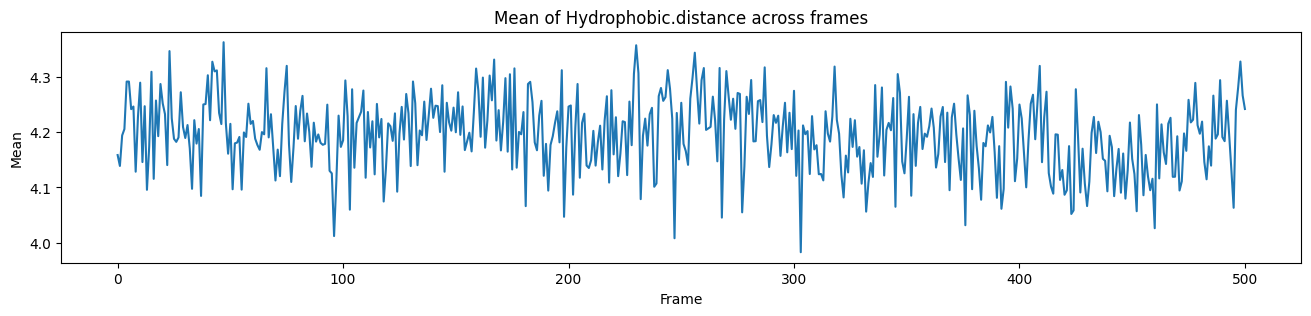

In [120]:
plt.figure(figsize=(16, 3))
plt.xlabel('Frame')
plt.ylabel('Mean')    
plt.title(f'Mean of Hydrophobic.distance across frames')
plt.plot(final_results_df.groupby('PDB_File')['Hydrophobic.distance'].mean())

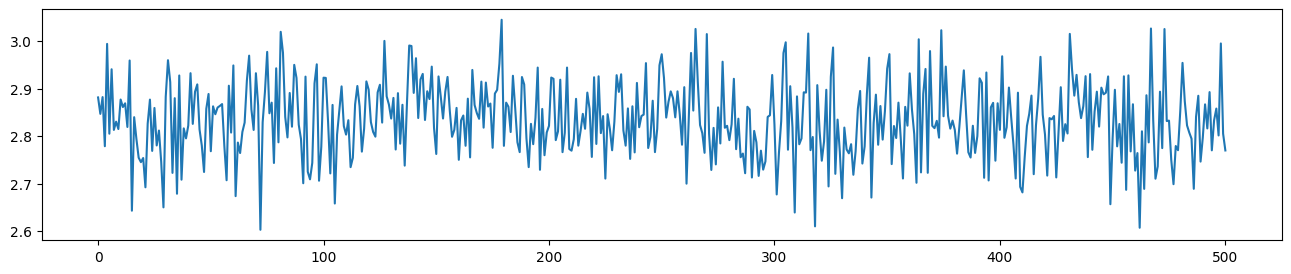

In [121]:
# Hydrophobic.distance	VdWContact.distance	HBDonor.distance	HBDonor.DHA_angle	Cationic.distance	HBAcceptor.distance	HBAcceptor.DHA_angle	PiStacking.distance	PiStacking.plane_angle	PiStacking.normal_to_centroid_angle	PiStacking.intersect_distance
plt.figure(figsize=(16, 3))
plt.plot(final_results_df.groupby('PDB_File')['VdWContact.distance'].mean())

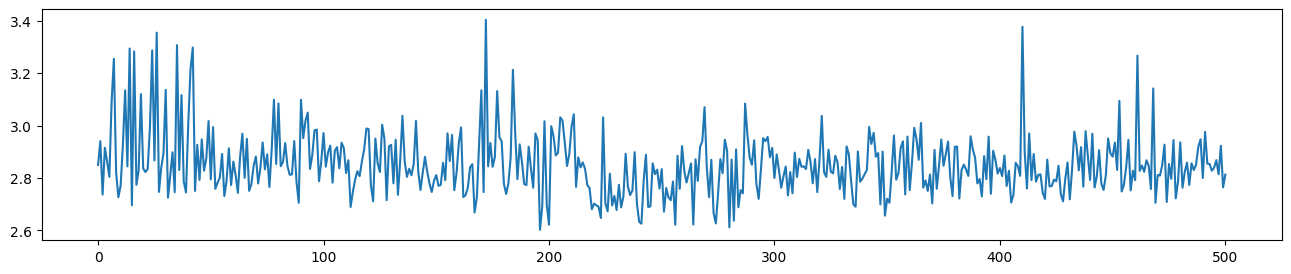

In [122]:
# Hydrophobic.distance	VdWContact.distance	HBDonor.distance	HBDonor.DHA_angle	Cationic.distance	HBAcceptor.distance	HBAcceptor.DHA_angle	PiStacking.distance	PiStacking.plane_angle	PiStacking.normal_to_centroid_angle	PiStacking.intersect_distance
plt.figure(figsize=(16, 3))
plt.plot(final_results_df.groupby('PDB_File')['HBDonor.distance'].mean())

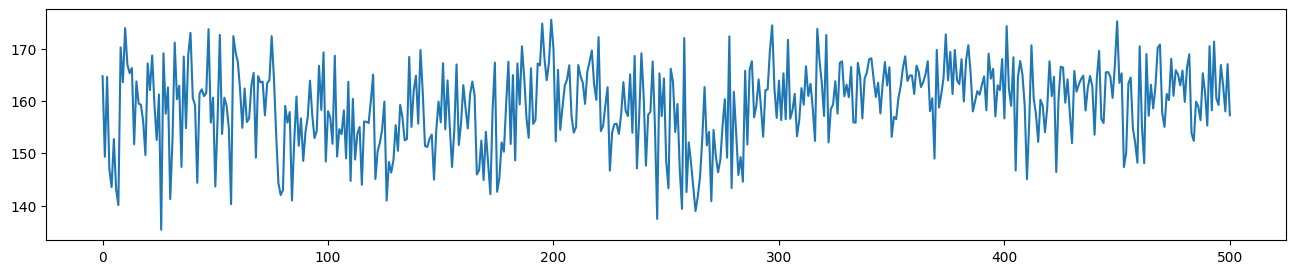

In [123]:
# Hydrophobic.distance	VdWContact.distance	HBDonor.distance	HBDonor.DHA_angle	Cationic.distance	HBAcceptor.distance	HBAcceptor.DHA_angle	PiStacking.distance	PiStacking.plane_angle	PiStacking.normal_to_centroid_angle	PiStacking.intersect_distance
plt.figure(figsize=(16, 3))
plt.plot(final_results_df.groupby('PDB_File')['HBDonor.DHA_angle'].mean())

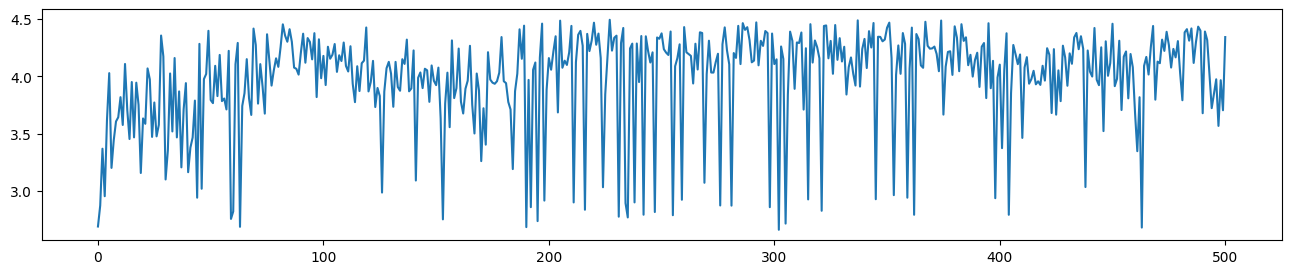

In [124]:
# Hydrophobic.distance	VdWContact.distance	HBDonor.distance	HBDonor.DHA_angle	Cationic.distance	HBAcceptor.distance	HBAcceptor.DHA_angle	PiStacking.distance	PiStacking.plane_angle	PiStacking.normal_to_centroid_angle	PiStacking.intersect_distance
plt.figure(figsize=(16, 3))
plt.plot(final_results_df.groupby('PDB_File')['Cationic.distance'].mean())

In [125]:
columns_to_group = [col for col in final_results_df.columns if col not in ['Residue', 'PDB_File', 'PiStacking.intersect_distance']]
mean_ts = final_results_df.groupby('PDB_File')[columns_to_group].mean()
mean_ts

Hydrophobic.distance  VdWContact.distance  HBDonor.distance  \
PDB_File                                                                
0                     4.158671             2.881685          2.849605   
1                     4.138941             2.847108          2.940352   
2                     4.194190             2.882431          2.736678   
3                     4.205684             2.778934          2.915441   
4                     4.291790             2.994458          2.863059   
...                        ...                  ...               ...   
496                   4.240571             2.858222          2.867999   
497                   4.281066             2.801651          2.814042   
498                   4.328069             2.995376          2.922955   
499                   4.266598             2.805369          2.763979   
500                   4.242091             2.770028          2.813167   

          HBDonor.DHA_angle  Cationic.distance  HBAcceptor.distance  \
PDB_File                                                              
0                164.721847           2.687845             2.976997   
1                149.326713           2.871689             2.874542   
2                164.566612           3.367998             2.913569   
3                146.999311           2.952610             3.059980   
4                143.550722           3.619478             2.900293   
...                     ...                ...                  ...   
496              166.849530           3.974744             3.246548   
497              162.977558           3.567381             2.803069   
498              157.989347           3.966772             3.015446   
499              167.023649           3.704123             2.865750   
500              157.255010           4.343858             2.962943   

          HBAcceptor.DHA_angle  PiStacking.distance  PiStacking.plane_angle  \
PDB_File                                                                      
0                   139.267214             4.544977               36.416105   
1                   140.708845             4.762738               47.816779   
2                   151.489963             3.650355                9.892147   
3                   146.629624             3.618223               11.464225   
4                   168.469855             3.660098               13.571072   
...                        ...                  ...                     ...   
496                 153.445956             3.925237               12.431945   
497                 159.509914             3.905568               11.083403   
498                 169.150756             5.043564               62.676932   
499                 143.381028             4.832441               40.041936   
500                 148.883575             3.699339                8.604439   

          PiStacking.normal_to_centroid_angle  
PDB_File                                       
0                                   17.011641  
1                                   19.781233  
2                                   22.674719  
3                                   24.271337  
4                                   22.081285  
...                                       ...  
496                                 24.911733  
497                                 23.927779  
498                                 93.329944  
499                                 80.672243  
500                                 10.822836  

[500 rows x 10 columns]

In [126]:
# for col in mean_ts.columns:
#     print(len(mean_ts[col]))

print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      mean_ts.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Hydrophobic.distance                   0
VdWContact.distance                    0
HBDonor.distance                       0
HBDonor.DHA_angle                      0
Cationic.distance                      0
HBAcceptor.distance                    9
HBAcceptor.DHA_angle                   9
PiStacking.distance                    6
PiStacking.plane_angle                 6
PiStacking.normal_to_centroid_angle    6
dtype: int64


## Checking for correlation between metrics

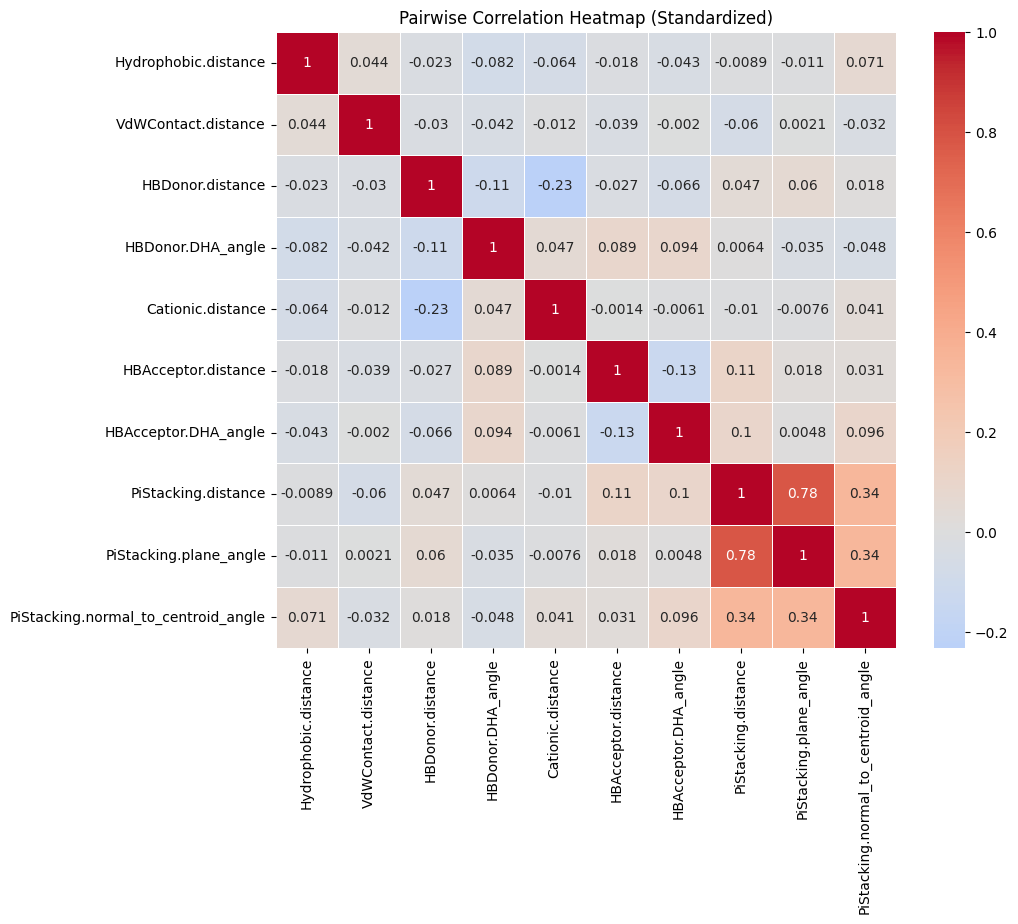

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mean_ts_scaled = scaler.fit_transform(mean_ts)

# Convert the scaled data back into a DataFrame
mean_ts_scaled = pd.DataFrame(mean_ts_scaled, columns=mean_ts.columns, index=mean_ts.index)

# Calculate correlation and plot as above
correlation_matrix = mean_ts_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Pairwise Correlation Heatmap (Standardized)')
plt.show()

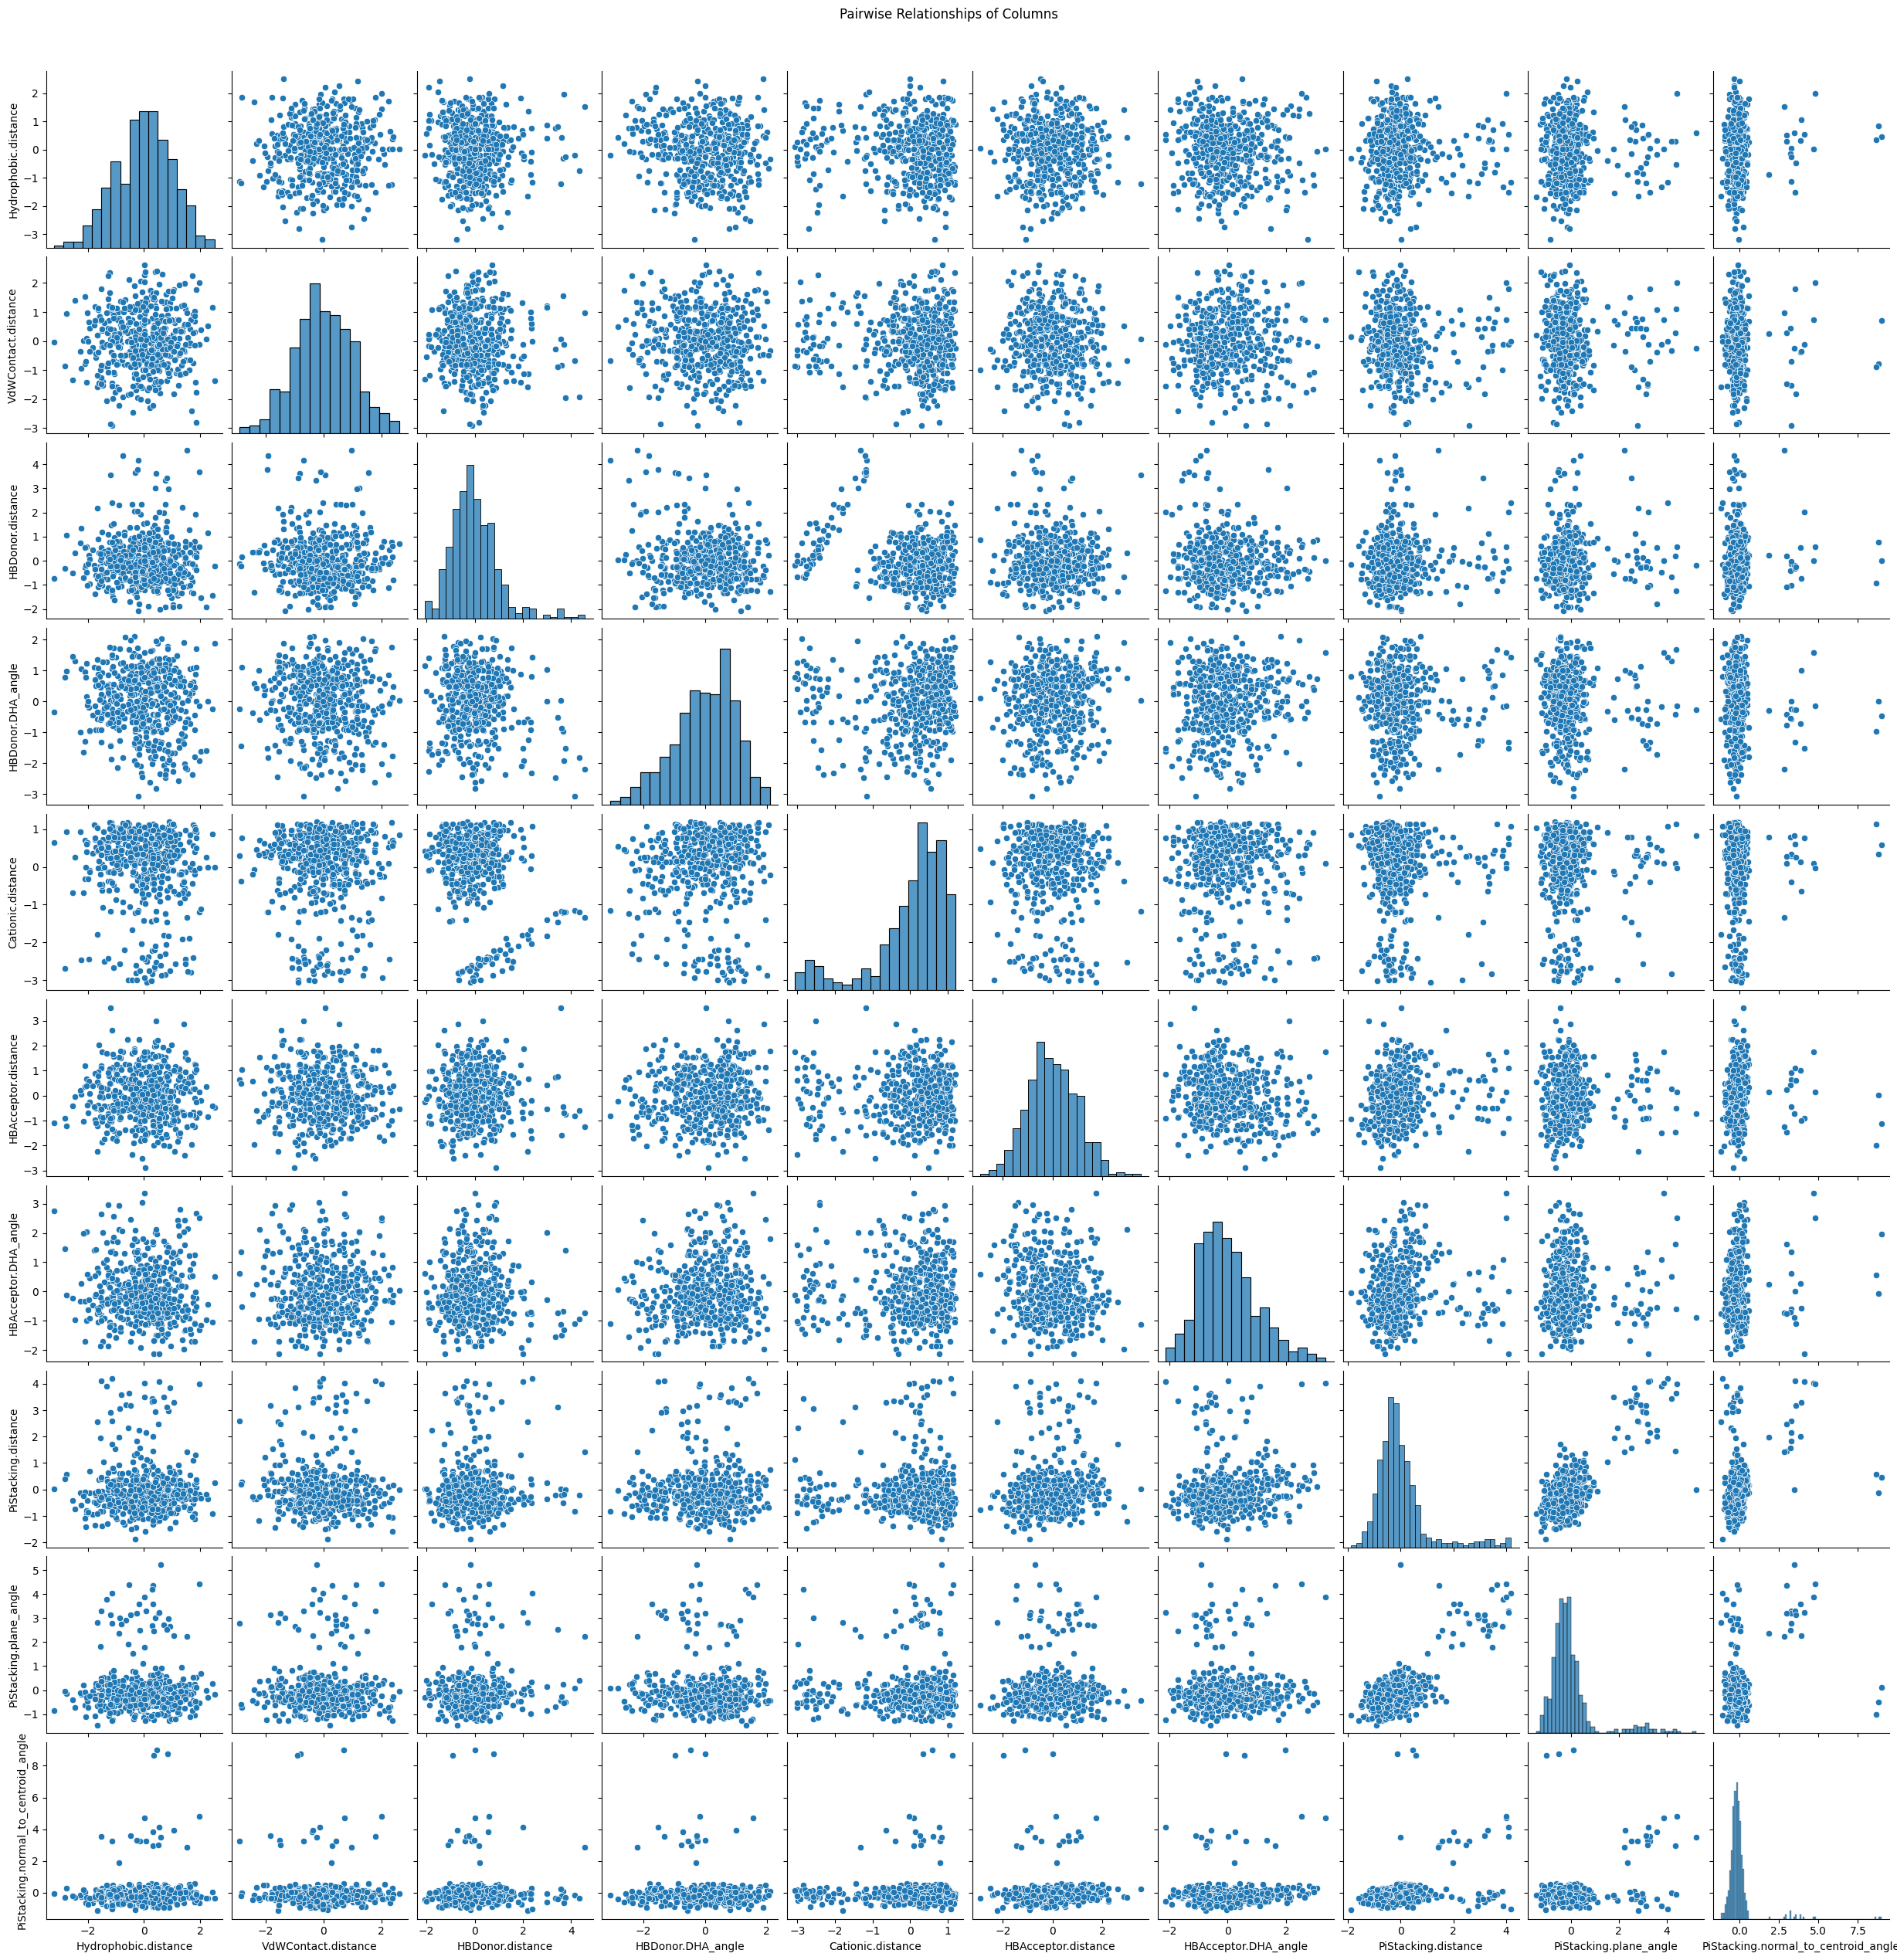

In [128]:
# Create a pairplot of mean_ts
sns.pairplot(mean_ts_scaled)
plt.suptitle('Pairwise Relationships of Columns', y=1.02)
plt.show()

## Testing for a +2 step increase in 2nd half of time series 

In [129]:
mean_ts_step = mean_ts.copy()

mean_ts_step.iloc[250:500] += 2

mean_ts_step

Hydrophobic.distance  VdWContact.distance  HBDonor.distance  \
PDB_File                                                                
0                     4.158671             2.881685          2.849605   
1                     4.138941             2.847108          2.940352   
2                     4.194190             2.882431          2.736678   
3                     4.205684             2.778934          2.915441   
4                     4.291790             2.994458          2.863059   
...                        ...                  ...               ...   
496                   6.240571             4.858222          4.867999   
497                   6.281066             4.801651          4.814042   
498                   6.328069             4.995376          4.922955   
499                   6.266598             4.805369          4.763979   
500                   6.242091             4.770028          4.813167   

          HBDonor.DHA_angle  Cationic.distance  HBAcceptor.distance  \
PDB_File                                                              
0                164.721847           2.687845             2.976997   
1                149.326713           2.871689             2.874542   
2                164.566612           3.367998             2.913569   
3                146.999311           2.952610             3.059980   
4                143.550722           3.619478             2.900293   
...                     ...                ...                  ...   
496              168.849530           5.974744             5.246548   
497              164.977558           5.567381             4.803069   
498              159.989347           5.966772             5.015446   
499              169.023649           5.704123             4.865750   
500              159.255010           6.343858             4.962943   

          HBAcceptor.DHA_angle  PiStacking.distance  PiStacking.plane_angle  \
PDB_File                                                                      
0                   139.267214             4.544977               36.416105   
1                   140.708845             4.762738               47.816779   
2                   151.489963             3.650355                9.892147   
3                   146.629624             3.618223               11.464225   
4                   168.469855             3.660098               13.571072   
...                        ...                  ...                     ...   
496                 155.445956             5.925237               14.431945   
497                 161.509914             5.905568               13.083403   
498                 171.150756             7.043564               64.676932   
499                 145.381028             6.832441               42.041936   
500                 150.883575             5.699339               10.604439   

          PiStacking.normal_to_centroid_angle  
PDB_File                                       
0                                   17.011641  
1                                   19.781233  
2                                   22.674719  
3                                   24.271337  
4                                   22.081285  
...                                       ...  
496                                 26.911733  
497                                 25.927779  
498                                 95.329944  
499                                 82.672243  
500                                 12.822836  

[500 rows x 10 columns]

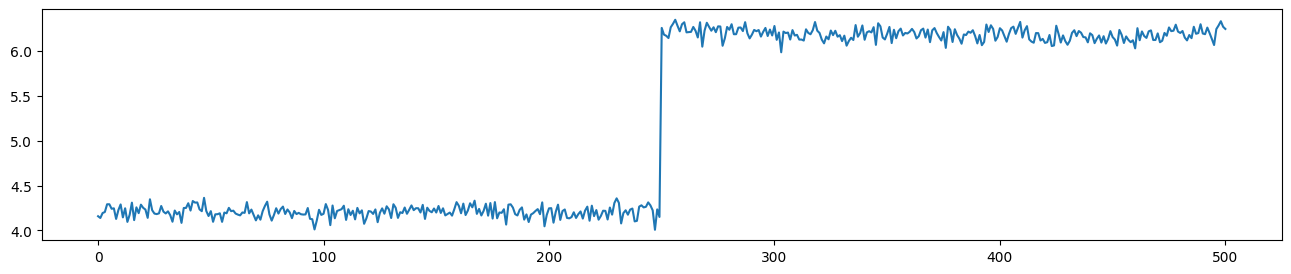

In [130]:
plt.figure(figsize=(16, 3))
plt.plot(mean_ts_step['Hydrophobic.distance'])

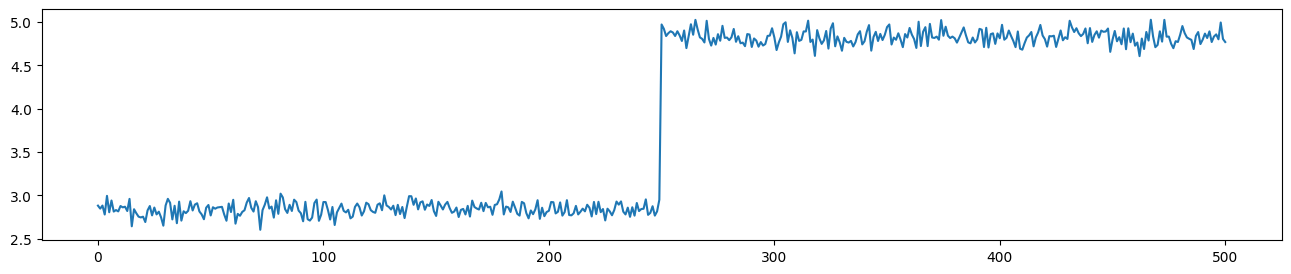

In [131]:
plt.figure(figsize=(16, 3))
plt.plot(mean_ts_step['VdWContact.distance'])

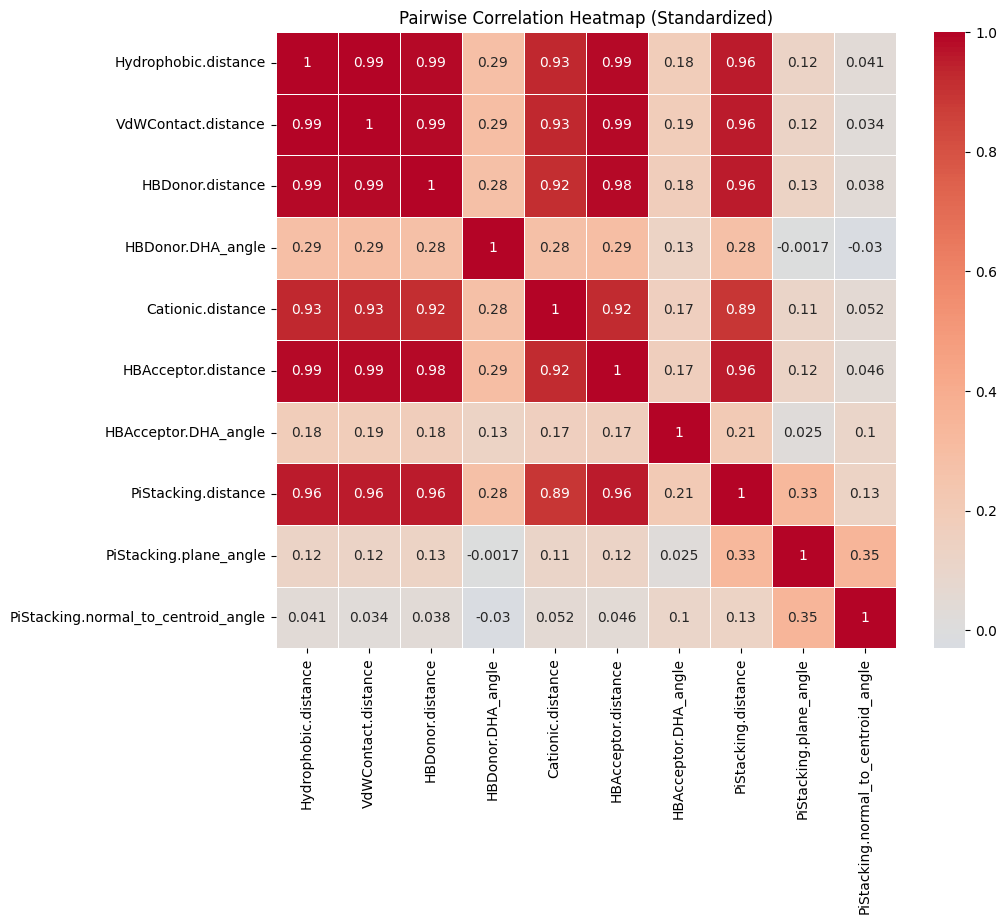

In [132]:
# Calculate the correlation matrix
scaler = StandardScaler()
mean_ts_step_scaled = scaler.fit_transform(mean_ts_step)

# Convert the scaled data back into a DataFrame
mean_ts_step_scaled = pd.DataFrame(mean_ts_step_scaled, columns=mean_ts_step.columns, index=mean_ts_step.index)

# Calculate correlation and plot as above
correlation_matrix2 = mean_ts_step_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Pairwise Correlation Heatmap (Standardized)')
plt.show()

In [133]:
mean_ts_step_scaled

Hydrophobic.distance  VdWContact.distance  HBDonor.distance  \
PDB_File                                                                
0                    -1.045828            -0.956103         -1.009615   
1                    -1.065728            -0.990784         -0.918252   
2                    -1.010002            -0.955355         -1.123310   
3                    -0.998408            -1.059163         -0.943331   
4                    -0.911558            -0.842992         -0.996070   
...                        ...                  ...               ...   
496                   1.054062             1.026366          1.022500   
497                   1.094907             0.969625          0.968175   
498                   1.142316             1.163931          1.077829   
499                   1.080313             0.973354          0.917772   
500                   1.055595             0.937907          0.967295   

          HBDonor.DHA_angle  Cationic.distance  HBAcceptor.distance  \
PDB_File                                                              
0                  0.568147          -1.960579            -1.000197   
1                 -1.363576          -1.803167            -1.100938   
2                  0.548669          -1.378210            -1.062563   
3                 -1.655610          -1.733879            -0.918601   
4                 -2.088326          -1.162885            -1.075617   
...                     ...                ...                  ...   
496                1.086074           0.853770             1.231392   
497                0.600233           0.504973             0.795331   
498               -0.025669           0.846944             1.004157   
499                1.107921           0.622055             0.856964   
500               -0.117811           1.169818             0.952531   

          HBAcceptor.DHA_angle  PiStacking.distance  PiStacking.plane_angle  \
PDB_File                                                                      
0                    -1.168171            -0.280697                1.822444   
1                    -0.997380            -0.078155                2.902429   
2                     0.279863            -1.112798               -0.690166   
3                    -0.295943            -1.142685               -0.541244   
4                     2.291477            -1.103736               -0.341662   
...                        ...                  ...                     ...   
496                   0.748531             1.003103               -0.260112   
497                   1.466930             0.984809               -0.387859   
498                   2.609084             2.043275                4.499589   
499                  -0.443865             1.846907                2.355379   
500                   0.208024             0.792991               -0.622691   

          PiStacking.normal_to_centroid_angle  
PDB_File                                       
0                                   -0.571130  
1                                   -0.378980  
2                                   -0.178234  
3                                   -0.067463  
4                                   -0.219406  
...                                       ...  
496                                  0.115724  
497                                  0.047458  
498                                  4.862480  
499                                  3.984307  
500                                 -0.861744  

[500 rows x 10 columns]

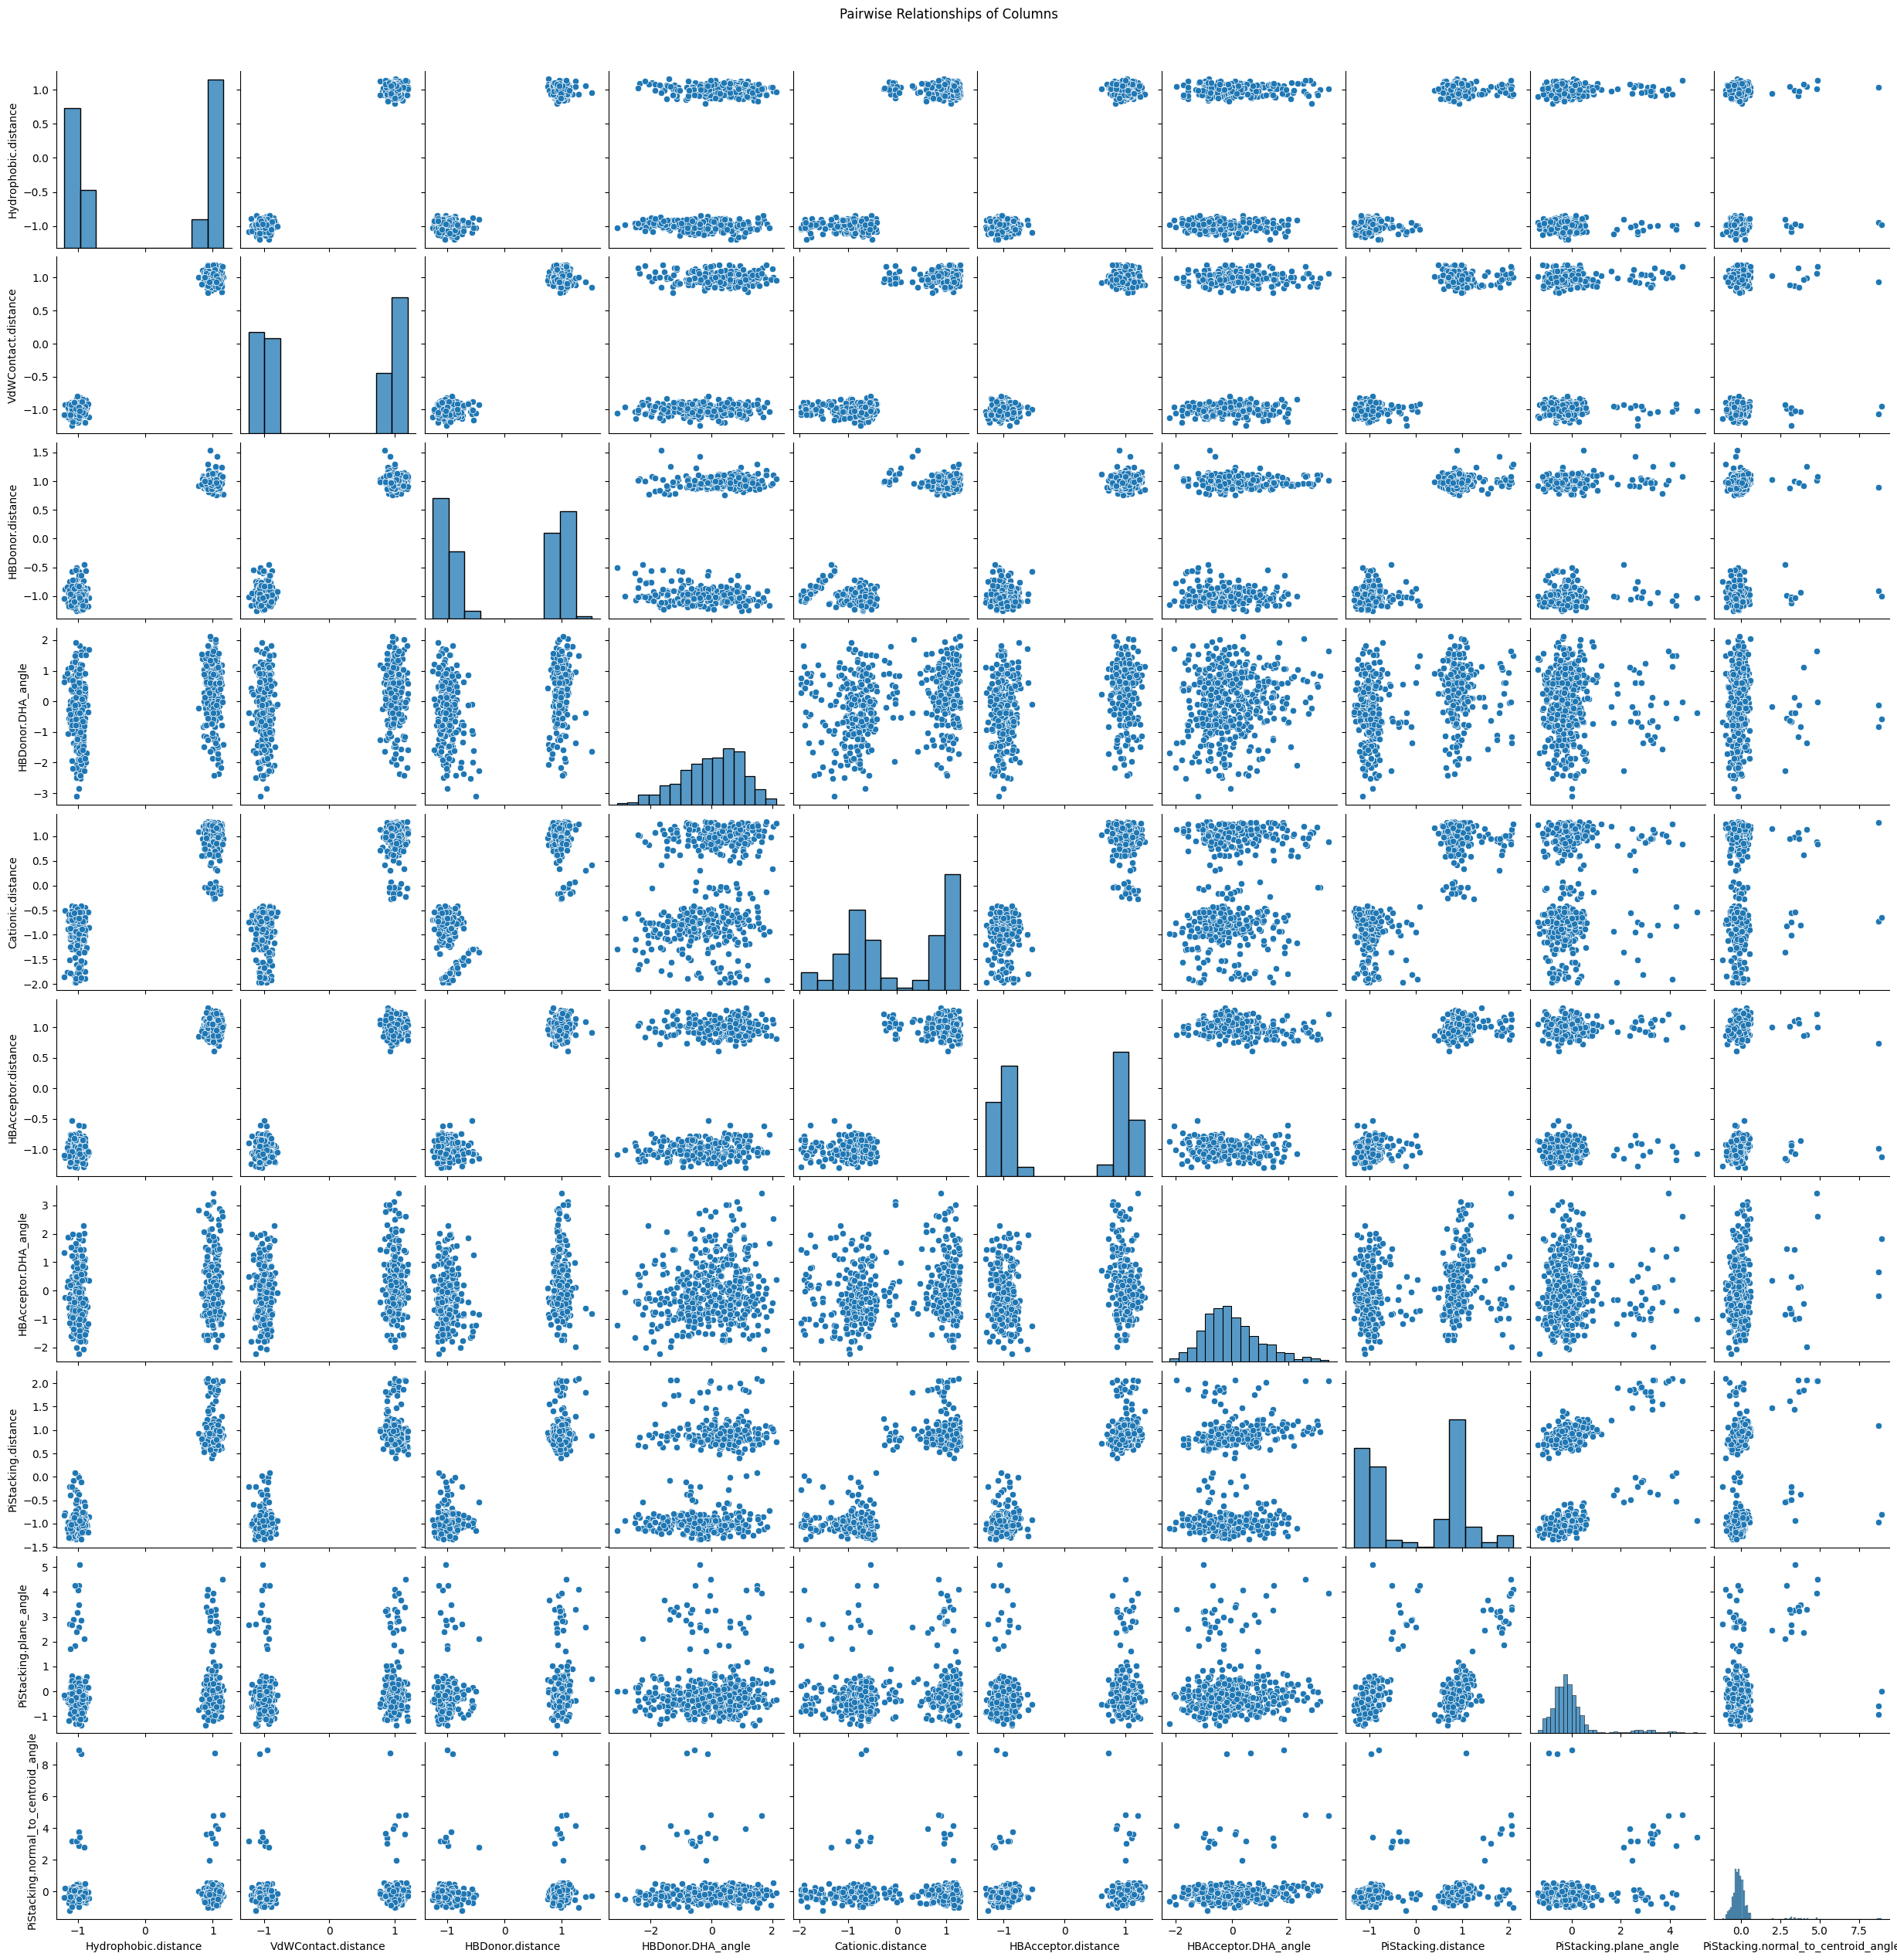

In [134]:
# Create a pairplot of mean_ts
sns.pairplot(mean_ts_step_scaled)
plt.suptitle('Pairwise Relationships of Columns', y=1.02)
plt.show()

## ACF AND PACF for each time series 

In [135]:
import plotly.graph_objs as go
from statsmodels.tsa.stattools import acf, pacf


In [136]:
def plot_acf_pacf(mean_ts, lags=40):
    # Prepare traces for ACF and PACF
    acf_traces = []
    pacf_traces = []

    # Loop through each column in mean_ts to calculate ACF and PACF
    for col in mean_ts.columns:
        ts_values = mean_ts[col].dropna()
        
        # Dynamically adjust the number of lags based on the series length
        max_lags = min(lags, len(ts_values) // 2 - 1)
        if max_lags < 1:
            print(f"Not enough data points for column '{col}' to compute ACF/PACF.")
            continue
        
        # Compute ACF and PACF
        acf_values = acf(ts_values, nlags=max_lags)
        pacf_values = pacf(ts_values, nlags=max_lags)
        
        # Create traces for ACF
        acf_trace = go.Scatter(
            x=np.arange(len(acf_values)),
            y=acf_values,
            mode='lines+markers',
            name=f'{col} ACF',
            visible='legendonly'  # Hide initially, let user select from legend
        )
        acf_traces.append(acf_trace)

        # Create traces for PACF
        pacf_trace = go.Scatter(
            x=np.arange(len(pacf_values)),
            y=pacf_values,
            mode='lines+markers',
            name=f'{col} PACF',
            visible='legendonly'  # Hide initially, let user select from legend
        )
        pacf_traces.append(pacf_trace)

    # Create ACF plot with all traces
    acf_fig = go.Figure(data=acf_traces)
    acf_fig.update_layout(
        title='ACF for Each Time Series',
        xaxis_title='Lags',
        yaxis_title='ACF Value',
        legend_title='Columns'
    )
    
    # Create PACF plot with all traces
    pacf_fig = go.Figure(data=pacf_traces)
    pacf_fig.update_layout(
        title='PACF for Each Time Series',
        xaxis_title='Lags',
        yaxis_title='PACF Value',
        legend_title='Columns'
    )
    
    
    acf_fig.show()
    pacf_fig.show()


plot_acf_pacf(mean_ts)

**Since there are no spikes after the 1st lag, there does not seem to be much correlation between the previous lags.**

## ACF and PACF for +2 step increase time series 

In [137]:
plot_acf_pacf(mean_ts_step_scaled, lags = 260)

## Seasonal decomposition

Breaks down the time series into three components:
- Trend: The long-term direction in the data (upward, downward, or flat).
- Seasonal: Regular and repeating short-term cycles or patterns (e.g., quarterly sales spikes).
- Residual: The remaining irregular or random noise after removing the trend and seasonal components.


In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [139]:
def plot_seasonal_decomposition(mean_ts, model='additive', freq=None):
    # Prepare traces for trend, seasonal, and residual
    trend_traces = []
    seasonal_traces = []
    residual_traces = []
    observed_traces = []

    # Loop through each column in mean_ts to decompose and plot
    for col in mean_ts.columns:
        ts_values = mean_ts[col].dropna()

        # Perform seasonal decomposition
        decomposition = seasonal_decompose(ts_values, model=model, period=freq)
        
        # Create traces for trend, seasonal, residual, and observed
        trend_trace = go.Scatter(
            x=ts_values.index,
            y=decomposition.trend,
            mode='lines',
            name=f'{col} Trend',
            visible='legendonly'  # Hide initially, let user select from legend
        )
        trend_traces.append(trend_trace)

        seasonal_trace = go.Scatter(
            x=ts_values.index,
            y=decomposition.seasonal,
            mode='lines',
            name=f'{col} Seasonal',
            visible='legendonly'
        )
        seasonal_traces.append(seasonal_trace)

        residual_trace = go.Scatter(
            x=ts_values.index,
            y=decomposition.resid,
            mode='lines',
            name=f'{col} Residual',
            visible='legendonly'
        )
        residual_traces.append(residual_trace)

        observed_trace = go.Scatter(
            x=ts_values.index,
            y=decomposition.observed,
            mode='lines',
            name=f'{col} Observed',
            visible='legendonly'
        )
        observed_traces.append(observed_trace)

    # Create a figure for each component
    trend_fig = go.Figure(data=trend_traces)
    trend_fig.update_layout(
        title='Trend Component for Each Time Series',
        xaxis_title='Time',
        yaxis_title='Trend',
        legend_title='Columns'
    )

    seasonal_fig = go.Figure(data=seasonal_traces)
    seasonal_fig.update_layout(
        title='Seasonal Component for Each Time Series',
        xaxis_title='Time',
        yaxis_title='Seasonal',
        legend_title='Columns'
    )

    residual_fig = go.Figure(data=residual_traces)
    residual_fig.update_layout(
        title='Residual Component for Each Time Series',
        xaxis_title='Time',
        yaxis_title='Residual',
        legend_title='Columns'
    )

    observed_fig = go.Figure(data=observed_traces)
    observed_fig.update_layout(
        title='Observed Values for Each Time Series',
        xaxis_title='Time',
        yaxis_title='Observed',
        legend_title='Columns'
    )

    # Display the figures
    trend_fig.show()
    seasonal_fig.show()
    residual_fig.show()
    observed_fig.show()



In [140]:
#  `freq` can be adjusted based on any periodicity in the data (e.g., 12 for monthly data if there's a yearly seasonality) - but in this case let's try 17 since there are 500 "time stamps"
plot_seasonal_decomposition(mean_ts, model='additive', freq=40)

Observations:
- The trend component shows that overall the time series has both upward and downward movements
- The seasonal component shows that there are recurring patterns at **up to to around 30 frames** with some frames showing a clear pattern than others.
- The residual component shows that there are also anomalies and unexpected changes at some points

## Checking seasonal decomposition for step increase time series

In [141]:
plot_seasonal_decomposition(mean_ts_step, model='additive', freq=40)

## Stationarity Test 

Checks whether the statistical properties (mean, variance, and autocorrelation) of a time series remain constant over time.


In [142]:
from statsmodels.tsa.stattools import adfuller 

In [143]:
#Perform Dickey-Fuller test:
def test_stationarity(timeseries):    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): # key, value mapping
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

p-value below  0.05  indicates that you can reject the null hypothesis and that the series is stationary.

In [144]:
stationarity_test = pd.DataFrame(columns=['Stationarity_Result'], index=mean_ts.columns)


In [145]:
#Perform Dickey-Fuller test:
def test_stationarity(timeseries):
    timeseries = pd.Series(timeseries).dropna()

    # Check if the time series is empty after dropping NaNs
    if len(timeseries) == 0:
        return "Insufficient Data"
        
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): # key, value mapping
        dfoutput['Critical Value (%s)'%key] = value
    #print(dfoutput)
    if dftest[0] < dftest[4]["5%"]:
        result = "Stationary"
    else:
         result = "Non-Stationary"
    return result

In [146]:
test_stationarity(mean_ts['Hydrophobic.distance'].values.tolist())

'Stationary'

In [147]:
for col in mean_ts.columns:
    stationarity_result = test_stationarity(mean_ts[col].values.tolist())
    stationarity_test.loc[col, 'Stationarity_Result'] = stationarity_result

stationarity_test

Stationarity_Result
Hydrophobic.distance                         Stationary
VdWContact.distance                          Stationary
HBDonor.distance                             Stationary
HBDonor.DHA_angle                            Stationary
Cationic.distance                            Stationary
HBAcceptor.distance                          Stationary
HBAcceptor.DHA_angle                         Stationary
PiStacking.distance                          Stationary
PiStacking.plane_angle                       Stationary
PiStacking.normal_to_centroid_angle          Stationary

All the measures are stationary. Their mean, variance and autocorrelation are constant over time.   

### Stationarity test for +2 step increase time series

In [148]:
for col in mean_ts_step.columns:
    stationarity_result = test_stationarity(mean_ts_step[col].values.tolist())
    stationarity_test.loc[col, 'Stationarity_Result'] = stationarity_result

stationarity_test

Stationarity_Result
Hydrophobic.distance                     Non-Stationary
VdWContact.distance                      Non-Stationary
HBDonor.distance                         Non-Stationary
HBDonor.DHA_angle                            Stationary
Cationic.distance                        Non-Stationary
HBAcceptor.distance                      Non-Stationary
HBAcceptor.DHA_angle                         Stationary
PiStacking.distance                      Non-Stationary
PiStacking.plane_angle                       Stationary
PiStacking.normal_to_centroid_angle          Stationary

Only the angle-based metrics are stationary but this could be because the +2 step increase is not large enough to suggest a significant change (angles are in the range of 0 to 180)

In [149]:
mean_ts.describe()

Hydrophobic.distance  VdWContact.distance  HBDonor.distance  \
count            500.000000           500.000000        500.000000   
mean               4.195539             2.834927          2.852403   
std                0.066826             0.079949          0.120741   
min                3.982612             2.602999          2.602402   
25%                4.149033             2.780106          2.773618   
50%                4.197452             2.832281          2.836741   
75%                4.241902             2.891339          2.913986   
max                4.363063             3.045234          3.403502   

       HBDonor.DHA_angle  Cationic.distance  HBAcceptor.distance  \
count         500.000000         500.000000           491.000000   
mean          159.193918           3.977620             2.996244   
std             7.741047           0.431488             0.130125   
min           135.388564           2.659285             2.619125   
25%           154.361887           3.842981             2.909010   
50%           159.925197           4.099187             2.989617   
75%           164.817375           4.274631             3.081391   
max           175.492855           4.495095             3.455677   

       HBAcceptor.DHA_angle  PiStacking.distance  PiStacking.plane_angle  \
count            491.000000           494.000000              494.000000   
mean             148.129698             3.846765               16.177774   
std                8.321227             0.299294               10.489747   
min              130.435018             3.283506                0.909581   
25%              142.276170             3.681744               10.869924   
50%              146.796278             3.786212               13.988659   
75%              152.898446             3.925102               17.699220   
max              176.092736             5.097511               71.073728   

       PiStacking.normal_to_centroid_angle  
count                           494.000000  
mean                             24.243730  
std                              14.426080  
min                               7.921682  
25%                              19.122297  
50%                              21.966729  
75%                              25.034967  
max                             153.649796

In [150]:
mean_ts.min()

Hydrophobic.distance                     3.982612
VdWContact.distance                      2.602999
HBDonor.distance                         2.602402
HBDonor.DHA_angle                      135.388564
Cationic.distance                        2.659285
HBAcceptor.distance                      2.619125
HBAcceptor.DHA_angle                   130.435018
PiStacking.distance                      3.283506
PiStacking.plane_angle                   0.909581
PiStacking.normal_to_centroid_angle      7.921682
dtype: float64

In [151]:
mean_ts.max()

Hydrophobic.distance                     4.363063
VdWContact.distance                      3.045234
HBDonor.distance                         3.403502
HBDonor.DHA_angle                      175.492855
Cationic.distance                        4.495095
HBAcceptor.distance                      3.455677
HBAcceptor.DHA_angle                   176.092736
PiStacking.distance                      5.097511
PiStacking.plane_angle                  71.073728
PiStacking.normal_to_centroid_angle    153.649796
dtype: float64

# Testing other metrics from MDAnalysis

## RMSD

In [152]:
from MDAnalysis.analysis import rms
import glob
import os

In [153]:
def calculate_rmsd_time_series(reference_pdb_path, pdb_folder_path):
    """
    Calculate the RMSD time series for a set of PDB files relative to a reference structure.
    
    Parameters:
    - reference_pdb_path: Path to the reference PDB file.
    - pdb_folder_path: Path to the folder containing PDB files for time series analysis.
    
    Returns:
    - time_series: A list of RMSD values.
    - pdb_files: A list of PDB file names corresponding to each RMSD value.
    """
    # Load the reference structure
    reference = mda.Universe(reference_pdb_path)

    # Get a list of PDB files sorted by their numerical order (if applicable)
    pdb_files = sorted(glob.glob(os.path.join(pdb_folder_path, "*.pdb")))

    rmsd_values = []

    # Iterate through each PDB file and calculate RMSD
    for pdb_file in pdb_files:
        # Load the current structure
        current_structure = mda.Universe(pdb_file)
        
        # Align the structures and calculate RMSD
        rmsd_calculation = rms.rmsd(
            current_structure.atoms.positions,
            reference.atoms.positions,
            center=True,  # Center structures before calculation
            superposition=True  # Align structures before calculation
        )
        
        rmsd_values.append(rmsd_calculation)
    
    return rmsd_values, pdb_files

In [154]:
# Example usage:
reference_pdb = "/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/tmp_0.pdb"
pdb_folder = "/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/frames/"

rmsd_values, pdb_files = calculate_rmsd_time_series(reference_pdb, pdb_folder)

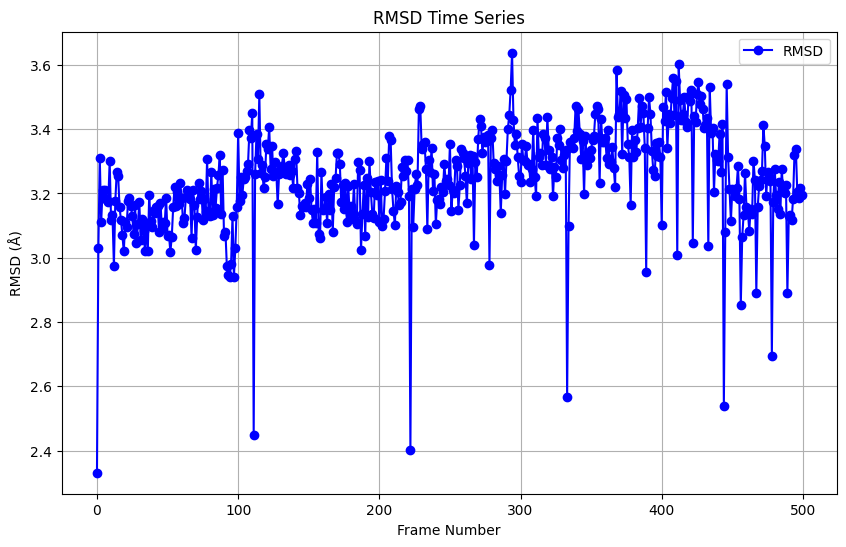

In [9]:
# Plotting the RMSD time series
plt.figure(figsize=(10, 6))
plt.plot(rmsd_values, marker='o', linestyle='-', color='b', label='RMSD')
plt.xlabel('Frame Number')
plt.ylabel('RMSD (Å)')
plt.title('RMSD Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [165]:
rmsd_values

[2.331572242070938,
 3.031798907116872,
 3.3099668554544275,
 3.111832814813372,
 3.21213410175269,
 3.185431915730849,
 3.210589768116385,
 3.179788996806912,
 3.172386741975462,
 3.301247165542742,
 3.117628924710141,
 3.132621313484437,
 2.975034524895649,
 3.1765365854409646,
 3.2665875126018182,
 3.2556532815658743,
 3.1571396332163153,
 3.1170446776647585,
 3.0704951323319687,
 3.0196713025882485,
 3.1103678134966573,
 3.095192498655597,
 3.176246204087551,
 3.1863337870552573,
 3.162264208356355,
 3.1283527489894345,
 3.0731179295291104,
 3.1630060415834556,
 3.044900534800776,
 3.103690303163463,
 3.172543153364085,
 3.0564420606835334,
 3.1216907644877114,
 3.0817888549674652,
 3.019919697725732,
 3.1072444018676992,
 3.021639724300483,
 3.1938599536552483,
 3.1128372250540495,
 3.094755948327274,
 3.145556954291013,
 3.1391149526659756,
 3.1570168669957415,
 3.1601721411600283,
 3.081054867851244,
 3.171121803582061,
 3.090036323947659,
 3.1125567039137634,
 3.107483003320867

In [171]:
len(rmsd_values)

500

In [172]:
pd.DataFrame(rmsd_values)

0
0    2.331572
1    3.031799
2    3.309967
3    3.111833
4    3.212134
..        ...
495  3.337559
496  3.204987
497  3.185348
498  3.215825
499  3.195955

[500 rows x 1 columns]

In [177]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


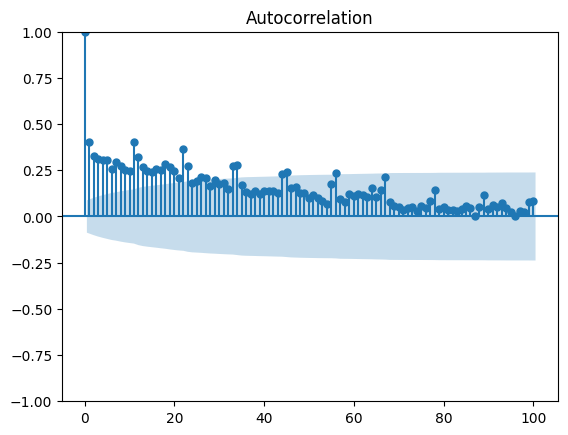

In [175]:
plot_acf(rmsd_values, lags=100);


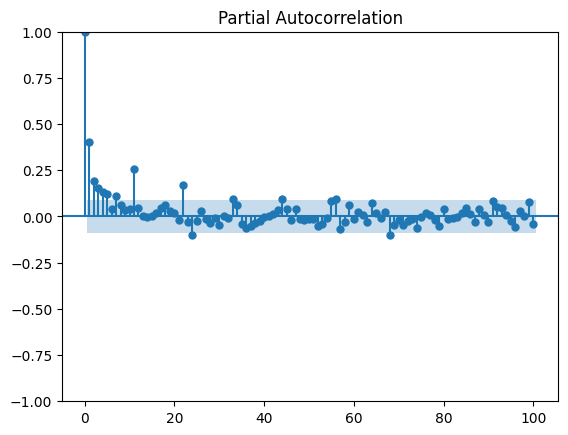

In [176]:
plot_pacf(rmsd_values,lags=100);

In [179]:
from MDAnalysis.analysis.rms import RMSF

def calculate_rmsf(reference_pdb_path, pdb_folder_path):
    """
    Calculate the RMSF for each atom in a set of PDB files relative to a reference structure.
    
    Parameters:
    - reference_pdb_path: Path to the reference PDB file.
    - pdb_folder_path: Path to the folder containing PDB files for time series analysis.
    
    Returns:
    - rmsf_values: Array of RMSF values for each atom.
    """
    # Load the reference structure
    reference = mda.Universe(reference_pdb_path)
    
    # Load all frames from the PDB files into a trajectory object
    pdb_files = sorted(glob.glob(os.path.join(pdb_folder_path, "*.pdb")))
    trajectory = mda.Universe(pdb_files[0], pdb_files[1:])  # Load multiple frames as a trajectory

    # Calculate RMSF for all atoms
    rmsf = RMSF(trajectory.atoms).run()
    rmsf_values = rmsf.rmsf
    
    return rmsf_values

In [180]:
rmsf_values = calculate_rmsf(reference_pdb, pdb_folder)



/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/protein-ligand/.venv/lib/python3.11/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning:

Reader has no dt information, set to 1.0 ps

/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/protein-ligand/.venv/lib/python3.11/site-packages/MDAnalysis/analysis/base.py:447: UserWarning:

Reader has no dt information, set to 1.0 ps

/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/protein-ligand/.venv/lib/python3.11/site-packages/MDAnalysis/analysis/rms.py:887: DeprecationWarning:

The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.



In [184]:
rmsf_values

array([7.52745318, 7.78902616, 7.72355592, ..., 2.41349772, 2.39583239,
       2.11103409])

In [187]:
len(rmsf_values)

4891

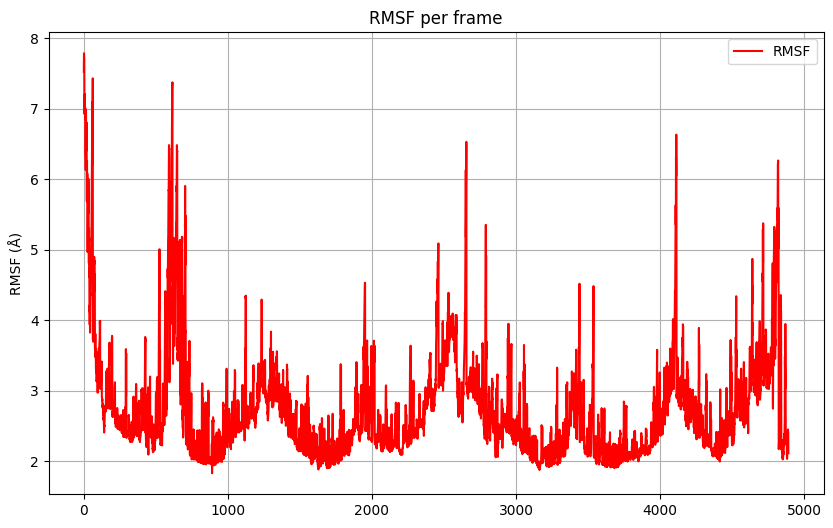

In [186]:
# Plotting RMSF
plt.figure(figsize=(10, 6))
plt.plot(rmsf_values, color='r', label='RMSF')
plt.ylabel('RMSF (Å)')
plt.title('RMSF per frame')
plt.legend()
plt.grid(True)
plt.show()

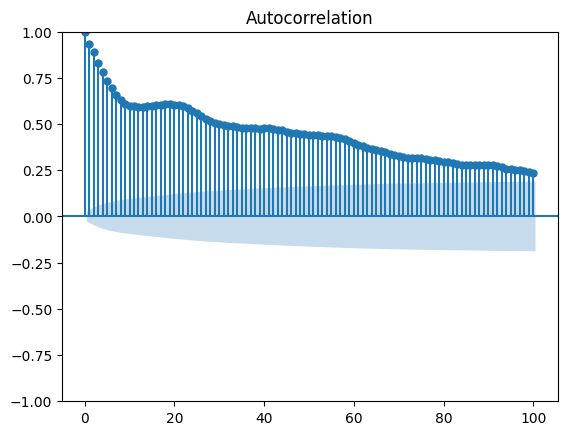

In [182]:
plot_acf(rmsf_values,lags=100);

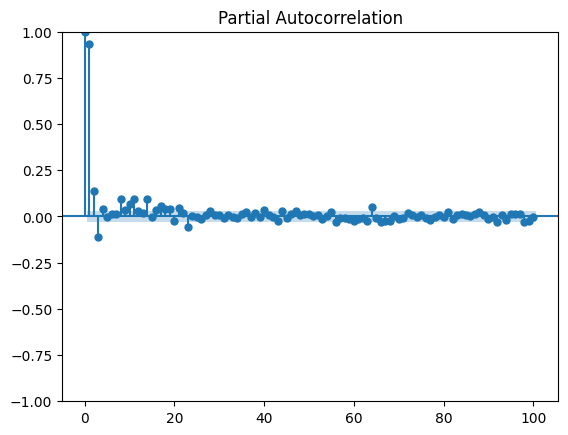

In [183]:
plot_pacf(rmsf_values,lags=100);

## Radius of Gyration

In [108]:
def radgyr(atomgroup, masses, total_mass=None):
    # coordinates change for each frame
    coordinates = atomgroup.positions
    center_of_mass = atomgroup.center_of_mass()

    # get squared distance from center
    ri_sq = (coordinates-center_of_mass)**2
    # sum the unweighted positions
    sq = np.sum(ri_sq, axis=1)
    sq_x = np.sum(ri_sq[:,[1,2]], axis=1) # sum over y and z
    sq_y = np.sum(ri_sq[:,[0,2]], axis=1) # sum over x and z
    sq_z = np.sum(ri_sq[:,[0,1]], axis=1) # sum over x and y

    # make into array
    sq_rs = np.array([sq, sq_x, sq_y, sq_z])

    # weight positions
    rog_sq = np.sum(masses*sq_rs, axis=1)/total_mass
    # square root and return
    return np.sqrt(rog_sq)


In [161]:
reference = mda.Universe(reference_pdb)
protein = reference.select_atoms('protein')
pdb_files = sorted(glob.glob(os.path.join(pdb_folder, "*.pdb")))
trajectory = mda.Universe(pdb_files[0], pdb_files[1:])  # Load multiple frames as a trajectory



/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/protein-ligand/.venv/lib/python3.11/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning:

Reader has no dt information, set to 1.0 ps



In [162]:
from MDAnalysis.analysis.base import (AnalysisBase,
                                      AnalysisFromFunction,
                                      analysis_class)

In [163]:
rog = AnalysisFromFunction(radgyr, trajectory,
                           protein, protein.masses,
                           total_mass=np.sum(protein.masses))
rog.run()

TypeError: radgyr() got multiple values for argument 'total_mass'

In [159]:
rog.results['timeseries'].shape

(1, 4)

Text(0.5, 0, 'Frame')

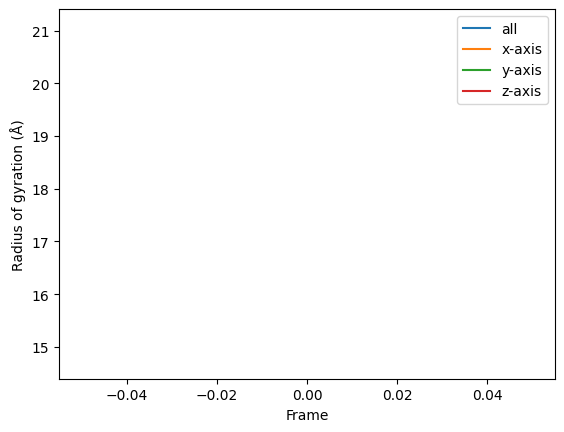

In [160]:
labels = ['all', 'x-axis', 'y-axis', 'z-axis']
for col, label in zip(rog.results['timeseries'].T, labels):
    plt.plot(col, label=label)
plt.legend()
plt.ylabel('Radius of gyration (Å)')
plt.xlabel('Frame')